In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

# 1. Cargar el dataset
data = pd.read_csv('DataSet.csv')

# 2. Limpieza del dataset
print("Información del dataset original:")
print(data.info())

# Limpiar datos: eliminar filas con valores nulos
data_cleaned = data.dropna()

# Mostrar información del dataset limpio
print("\nInformación del dataset limpio:")
print(data_cleaned.info())

Información del dataset original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Date           1000 non-null   object 
 10  Time           1000 non-null   object 
 11  Payment        1000 non-null   object 
 12  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB
None

Información del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 co


Estadísticas descriptivas del dataset limpio:
        Unit price     Quantity       Tax 5%        Total      Rating
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000
mean     55.672130     5.510000    15.379369   322.966749     6.97270
std      26.494628     2.923431    11.708825   245.885335     1.71858
min      10.080000     1.000000     0.508500    10.678500     4.00000
25%      32.875000     3.000000     5.924875   124.422375     5.50000
50%      55.230000     5.000000    12.088000   253.848000     7.00000
75%      77.935000     8.000000    22.445250   471.350250     8.50000
max      99.960000    10.000000    49.650000  1042.650000    10.00000


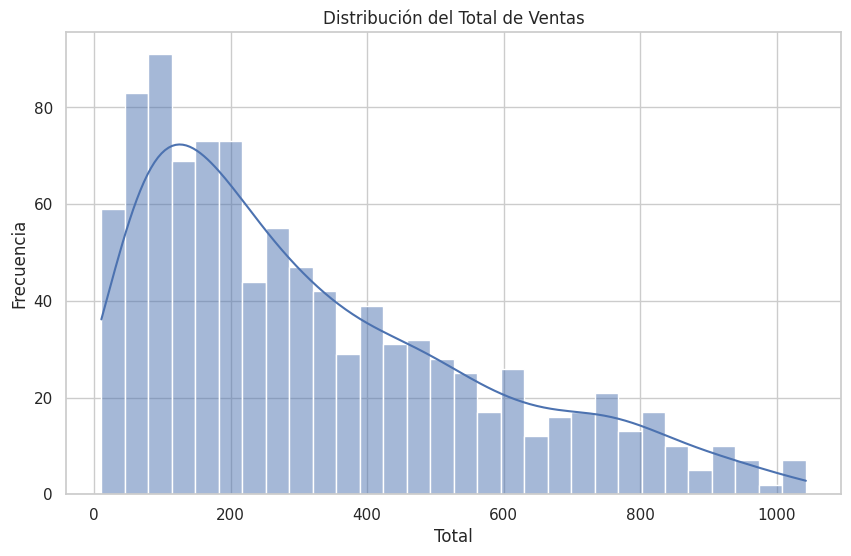

In [132]:
# 3. Análisis exploratorio
print("\nEstadísticas descriptivas del dataset limpio:")
print(data_cleaned.describe())

# Visualización de la distribución de la variable 'Total'
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Total'], bins=30, kde=True)
plt.title('Distribución del Total de Ventas')
plt.xlabel('Total')
plt.ylabel('Frecuencia')
plt.show()

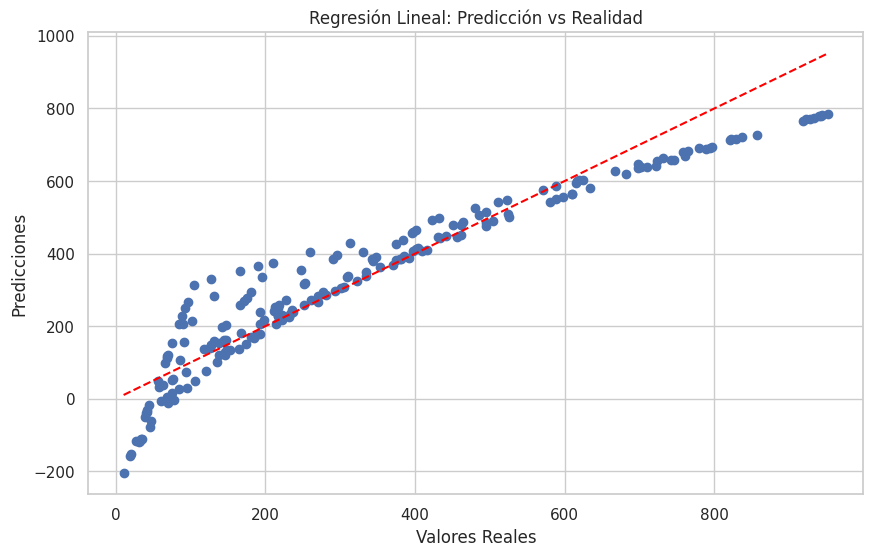

MSE Regresión Lineal: 6228.045510688692


In [133]:
# 4. Modelos de Regresión Lineal
X = data_cleaned[['Unit price', 'Quantity']]
y = data_cleaned['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Visualización de resultados de Regresión Lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Regresión Lineal: Predicción vs Realidad')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

print("MSE Regresión Lineal:", mean_squared_error(y_test, y_pred_linear))

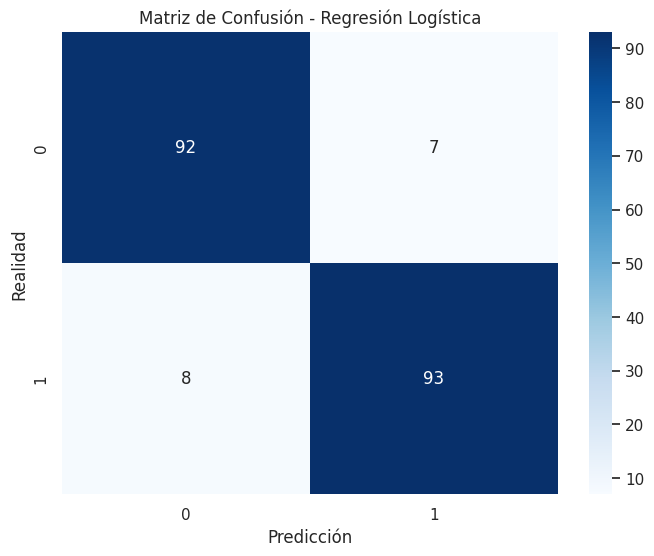

Accuracy Regresión Logística: 0.925


In [134]:
# 5. Modelos de Regresión Logística
data_cleaned['High_Sales'] = np.where(data_cleaned['Total'] > data_cleaned['Total'].median(), 1, 0)

X_logistic = data_cleaned[['Unit price', 'Quantity']]
y_logistic = data_cleaned['High_Sales']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train_log, y_train_log)
y_pred_logistic = logistic_model.predict(X_test_log)

# Visualización de resultados de Regresión Logística
conf_matrix = confusion_matrix(y_test_log, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

print("Accuracy Regresión Logística:", accuracy_score(y_test_log, y_pred_logistic))

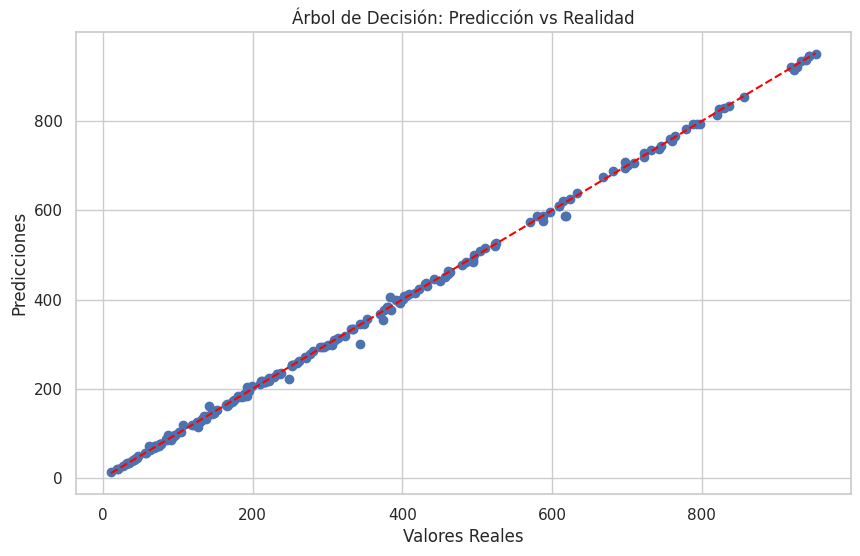

MSE Árbol de Decisión: 43.20293764500004


In [135]:
# 6. Modelos de Árbol de Decisión
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Visualización de resultados de Árbol de Decisión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Árbol de Decisión: Predicción vs Realidad')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

print("MSE Árbol de Decisión:", mean_squared_error(y_test, y_pred_tree))


Comparativa de Modelos:
MSE Regresión Lineal: 6228.045510688692
MSE Árbol de Decisión: 43.20293764500004
Accuracy Regresión Logística: 0.925


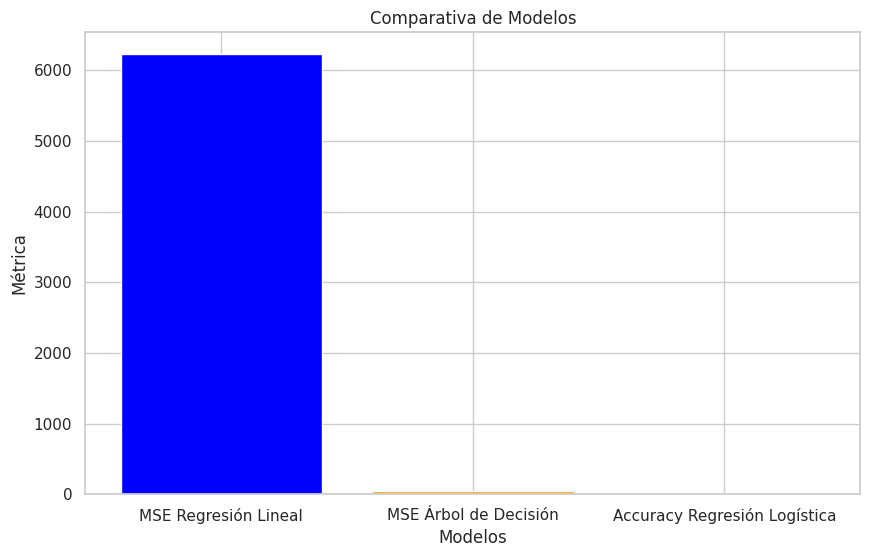

El mejor modelo es: Árbol de Decisión


In [136]:
# 7. Evaluación comparativa entre modelos
print("Comparativa de Modelos:")

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_tree = mean_squared_error(y_test, y_pred_tree)
accuracy_logistic = accuracy_score(y_test_log, y_pred_logistic)

print(f"MSE Regresión Lineal: {mse_linear}")
print(f"MSE Árbol de Decisión: {mse_tree}")
print(f"Accuracy Regresión Logística: {accuracy_logistic}")

# Gráfica de Comparación de Modelos
plt.figure(figsize=(10, 6))
metrics = {'MSE Regresión Lineal': mse_linear, 'MSE Árbol de Decisión': mse_tree, 'Accuracy Regresión Logística': accuracy_logistic}
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green'])
plt.title('Comparativa de Modelos')
plt.xlabel('Modelos')
plt.ylabel('Métrica')
plt.show()

# Determinar el mejor modelo
if mse_linear < mse_tree:
    best_model = "Regresión Lineal"
else:
    best_model = "Árbol de Decisión"

print(f"El mejor modelo es: {best_model}")